In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
# load all result json files under the /results folder
import glob
import json
import os

results = glob.glob('tests/*.json')
print(results)

['tests/lhj_100_chroma_mpnet-base-v2.json', 'tests/llama3_faiss_test_hypo_promptENG3.json', 'tests/llama3_faiss_test_rerank.json', 'tests/llama3_recursive_chunk750_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk1500_chroma_top3_sample100.json', 'tests/alan_llama3_recursive_chunk1000_faiss_top3_100.json', 'tests/lhj_100_chrom_all-MiniLM-L12-v2.json', 'tests/lhj_100_1000sublinkfiles_chroma_similarity_all-MiniLM-L6-v2.json', 'tests/llama3_recursive_chunk1000_chroma_top3_sample100.json', 'tests/lhj_100_1000sublinkfiles_chroma_mmr_all-MiniLM-L6-v2.json', 'tests/llama3_semantic_chroma_top3_sample100.json', 'tests/llama3_character_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk2000_chroma_top3_sample100.json', 'tests/lhj_100_10000sublinkfiles_faiss_mmr_multi-qa-MiniLM-L6-cos-v1.json', 'tests/lhj_100_10000sublinkfiles_faiss_mmr_all-MiniLM-L6-v2.json', 'tests/lhj_100_chroma_all-MiniLM-L6-v2.json', 'tests/lhj_100_faiss_all-MiniLM-L12-v2.json', 'tests/lhj_100_faiss_mmr_all-M

In [172]:
default_chroma_results = "tests/llama3_recursive_chunk1000_chroma_top3_sample100.json"
# group 1: chunking-size experiments
chunking_size_results = [r for r in results if 'chunk' in r and 'chroma' in r]
print(chunking_size_results)

# group 2: text splitter experiments
splitter_type = ["semantic", "tokensplit", "character"]
splitter_type_results = [r for r in results if any([s in r for s in splitter_type])]
splitter_type_results.append(default_chroma_results)
print(splitter_type_results)

# group3: retriver-type experiments
retriever_type_results = ["tests/lhj_100_chroma_all-MiniLM-L6-v2.json", 
                          "tests/lhj_100_faiss_all-MiniLM-L6-v2.json"]
print(retriever_type_results)

# group4: embedding-model experiments
embedding_model_results = ["tests/lhj_100_faiss_all-MiniLM-L6-v2.json", 
                           "tests/lhj_100_faiss_all-MiniLM-L12-v2.json", 
                            "tests/lhj_100_chroma_all-MiniLM-L6-v2.json",
                            "tests/lhj_100_chrom_all-MiniLM-L12-v2.json"]

# group4: faiss-hyper-param experiments
faiss_hyper_param_results = ["tests/lhj_100_faiss_mmr_all-MiniLM-L6-v2.json", 
                             "tests/lhj_100_faiss_all-MiniLM-L6-v2.json"]
print(faiss_hyper_param_results)

# group5: add-sublink-data experiments --> can be compared with group4
add_sublink_data_results = ["tests/lhj_100_1000sublinkfiles_faiss_mmr_all-MiniLM-L6-v2.json", 
                            "tests/lhj_100_1000sublinkfiles_faiss_similarity_all-MiniLM-L6-v2.json"]
print(add_sublink_data_results)

# group6: faiss-reranking experiments
reranking_results = ["tests/llama3_faiss_test.json", "tests/llama3_faiss_test_rerank.json", "tests/llama3_faiss_test_rerank_t5.json", "tests/llama3_faiss_test_rerank_MiniLM.json"]
print(reranking_results)

# group7: faiss-hypo-doc experiments
hypo_doc_results = ["tests/llama3_faiss_test.json", "tests/llama3_faiss_test_hypo.json", "tests/llama3_faiss_test_hypo_promptENG3.json"]
print(hypo_doc_results)

['tests/llama3_recursive_chunk750_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk1500_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk1000_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk2000_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk500_chroma_top3_sample100.json']
['tests/llama3_semantic_chroma_top3_sample100.json', 'tests/llama3_character_chroma_top3_sample100.json', 'tests/llama3_tokensplit_chroma_top3_sample100.json', 'tests/llama3_recursive_chunk1000_chroma_top3_sample100.json']
['tests/lhj_100_chroma_all-MiniLM-L6-v2.json', 'tests/lhj_100_faiss_all-MiniLM-L6-v2.json']
['tests/lhj_100_faiss_mmr_all-MiniLM-L6-v2.json', 'tests/lhj_100_faiss_all-MiniLM-L6-v2.json']
['tests/lhj_100_1000sublinkfiles_faiss_mmr_all-MiniLM-L6-v2.json', 'tests/lhj_100_1000sublinkfiles_faiss_similarity_all-MiniLM-L6-v2.json']
['tests/llama3_faiss_test.json', 'tests/llama3_faiss_test_rerank.json', 'tests/llama3_faiss_test_rerank_t5.json', 'tests/llama3_faiss_te

In [173]:
# for each group, load json files and convert them to pandas dataframe, use the json file name as the index
def load_json_results(json_files):
    results = []
    for json_file in json_files:
        with open(json_file) as f:
            data = json.load(f)
            # remove the file extension
            data['name'] = os.path.basename(json_file).split('.')[0]
            results.append(data)

    df = pd.DataFrame(results)
    # set the index to the name of the json file
    df.set_index('name', inplace=True)
    return df

In [174]:
chunking_size_df = load_json_results(chunking_size_results)
splitter_type_df = load_json_results(splitter_type_results)
retriever_type_df = load_json_results(retriever_type_results)
embedding_model_df = load_json_results(embedding_model_results)
faiss_hyper_param_df = load_json_results(faiss_hyper_param_results)
add_sublink_data_df = load_json_results(add_sublink_data_results)
reranking_df = load_json_results(reranking_results)
hypo_doc_df = load_json_results(hypo_doc_results)

In [175]:
# add a column chunk_size to the chunking_size_df
chunking_size_df['chunk_size'] = [int(name.split('_')[2].replace('chunk', '')) for name in chunking_size_df.index]
chunking_size_df.head()

,Exact Match,F1 Score,Answer Recall,chunk_size
name,,,,
llama3_recursive_chunk750_chroma_top3_sample100,40.0,47.173110,48.866667,750
llama3_recursive_chunk1500_chroma_top3_sample100,39.0,47.716955,50.147619,1500
llama3_recursive_chunk1000_chroma_top3_sample100,44.0,54.234645,56.169048,1000
llama3_recursive_chunk2000_chroma_top3_sample100,34.0,42.042483,44.600000,2000
llama3_recursive_chunk500_chroma_top3_sample100,42.0,51.231668,52.500000,500


In [176]:
# add a column splitter_type to the splitter_type_df
splitter_type_df['splitter_type'] = [name.split('_')[1] for name in splitter_type_df.index]
splitter_type_df.head()

,Exact Match,F1 Score,Answer Recall,splitter_type
name,,,,
llama3_semantic_chroma_top3_sample100,38.532110,47.614718,48.344619,semantic
llama3_character_chroma_top3_sample100,38.764045,46.279250,47.754370,character
llama3_tokensplit_chroma_top3_sample100,40.000000,46.777799,49.005556,tokensplit
llama3_recursive_chunk1000_chroma_top3_sample100,44.000000,54.234645,56.169048,recursive


In [177]:
# add a column retriever_type to the retriever_type_df
retriever_type_df['retriever_type'] = [name.split('_')[2] for name in retriever_type_df.index]
retriever_type_df.head()

,Exact Match,F1 Score,Answer Recall,retriever_type
name,,,,
lhj_100_chroma_all-MiniLM-L6-v2,41.0,50.973001,53.024603,chroma
lhj_100_faiss_all-MiniLM-L6-v2,49.0,59.707864,61.616667,faiss


In [178]:
# add a column embedding_model to the embedding_model_df
embedding_model_df['embedding_model'] = [name.split('_')[3] for name in embedding_model_df.index]
embedding_model_df['retrieve_type'] = ["faiss", "faiss", "chroma", "chroma"]
embedding_model_df.head()

,Exact Match,F1 Score,Answer Recall,embedding_model,retrieve_type
name,,,,,
lhj_100_faiss_all-MiniLM-L6-v2,49.00000,59.707864,61.616667,all-MiniLM-L6-v2,faiss
lhj_100_faiss_all-MiniLM-L12-v2,37.00000,45.032257,46.591667,all-MiniLM-L12-v2,faiss
lhj_100_chroma_all-MiniLM-L6-v2,41.00000,50.973001,53.024603,all-MiniLM-L6-v2,chroma
lhj_100_chrom_all-MiniLM-L12-v2,32.48731,38.178185,39.361252,all-MiniLM-L12-v2,chroma


In [179]:
# add a column faiss_hyper_param to the faiss_hyper_param_df
faiss_hyper_param_df['faiss_hyper_param'] = ['mmr', 'similarity']
faiss_hyper_param_df['add_sublink_data'] = ['No_sublink', 'No_sublink']
# add a column add_sublink_data to the add_sublink_data_df
add_sublink_data_df['add_sublink_data'] = ['1k_sublink', '1k_sublink']
add_sublink_data_df['faiss_hyper_param'] = ['mmr', 'similarity']
# combine with the faiss_hyper_param_df
add_sublink_faiss_metric_df = pd.concat([add_sublink_data_df, faiss_hyper_param_df])
add_sublink_faiss_metric_df.head()

,Exact Match,F1 Score,Answer Recall,add_sublink_data,faiss_hyper_param
name,,,,,
lhj_100_1000sublinkfiles_faiss_mmr_all-MiniLM-L6-v2,40.0,50.772446,52.300000,1k_sublink,mmr
lhj_100_1000sublinkfiles_faiss_similarity_all-MiniLM-L6-v2,37.0,46.582026,48.116667,1k_sublink,similarity
lhj_100_faiss_mmr_all-MiniLM-L6-v2,44.0,52.700792,54.344444,No_sublink,mmr
lhj_100_faiss_all-MiniLM-L6-v2,49.0,59.707864,61.616667,No_sublink,similarity


In [180]:
# add a column reranking_type to the reranking_df
reranking_df['reranking_type'] = ['no_rerank', 'ms-marco-MultiBERT-L-12', 'rank-T5-flan', 'ms-marco-MiniLM-L-12-v2']
reranking_df.head()

,Exact Match,F1 Score,Answer Recall,reranking_type
name,,,,
llama3_faiss_test,48.62069,58.705491,60.660920,no_rerank
llama3_faiss_test_rerank,39.00000,48.425397,50.138095,ms-marco-MultiBERT-L-12
llama3_faiss_test_rerank_t5,34.00000,38.897700,39.966667,rank-T5-flan
llama3_faiss_test_rerank_MiniLM,49.00000,58.903968,60.719048,ms-marco-MiniLM-L-12-v2


In [181]:
# add a column hypo_doc_type to the hypo_doc_df
hypo_doc_df['hypo_doc_type'] = ['no_hypo', 'hypo', 'hypo_promptENG']
hypo_doc_df.head()

,Exact Match,F1 Score,Answer Recall,hypo_doc_type
name,,,,
llama3_faiss_test,48.62069,58.705491,60.660920,no_hypo
llama3_faiss_test_hypo,40.00000,48.599558,50.416667,hypo
llama3_faiss_test_hypo_promptENG3,40.00000,50.579617,53.516667,hypo_promptENG


In [182]:
# melt the dataframe to make it easier to plot
def melt_df(df, id_vars):
    return pd.melt(df, id_vars=id_vars,
                    value_vars=['Exact Match', 'F1 Score', 'Answer Recall'],
                    var_name='metric', value_name='score')
    
# process all the dataframes
chunking_size_df = melt_df(chunking_size_df, ['chunk_size'])
splitter_type_df = melt_df(splitter_type_df, ['splitter_type'])
retriever_type_df = melt_df(retriever_type_df, ['retriever_type'])
embedding_model_df = melt_df(embedding_model_df, ['embedding_model', 'retrieve_type'])
add_sublink_faiss_metric_df = melt_df(add_sublink_faiss_metric_df, ['faiss_hyper_param', 'add_sublink_data'])
reranking_df = melt_df(reranking_df, ['reranking_type'])
hypo_doc_df = melt_df(hypo_doc_df, ['hypo_doc_type'])

In [122]:
add_sublink_faiss_metric_df.head(20)

,faiss_hyper_param,add_sublink_data,metric,score
0,mmr,yes,Exact Match,40.000000
1,similarity,yes,Exact Match,37.000000
2,mmr,No,Exact Match,44.000000
3,similarity,No,Exact Match,49.000000
4,mmr,yes,F1 Score,50.772446
5,similarity,yes,F1 Score,46.582026
6,mmr,No,F1 Score,52.700792
7,similarity,No,F1 Score,59.707864
8,mmr,yes,Answer Recall,52.300000
9,similarity,yes,Answer Recall,48.116667


In [199]:
# plot ta grouped bar chart, use the id_vars as the x-axis, and the metric as the hue
def plot_grouped_bar_chart(df, id_vars, title):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(x="metric", y='score', hue=id_vars[0], data=df, kind='bar', height=6, aspect=2, palette='viridis')
    g.set_axis_labels("", "Score")
    g.set_titles(title)
    g.despine(left=True)
    g.set_xticklabels(rotation=45)
    # add the score value on top of each bar
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    # add title and show the plot
    plt.title(title, fontsize=16)
    plt.show()
    
    # save the plot
    g.savefig(f"../report/plots/{title}.png")

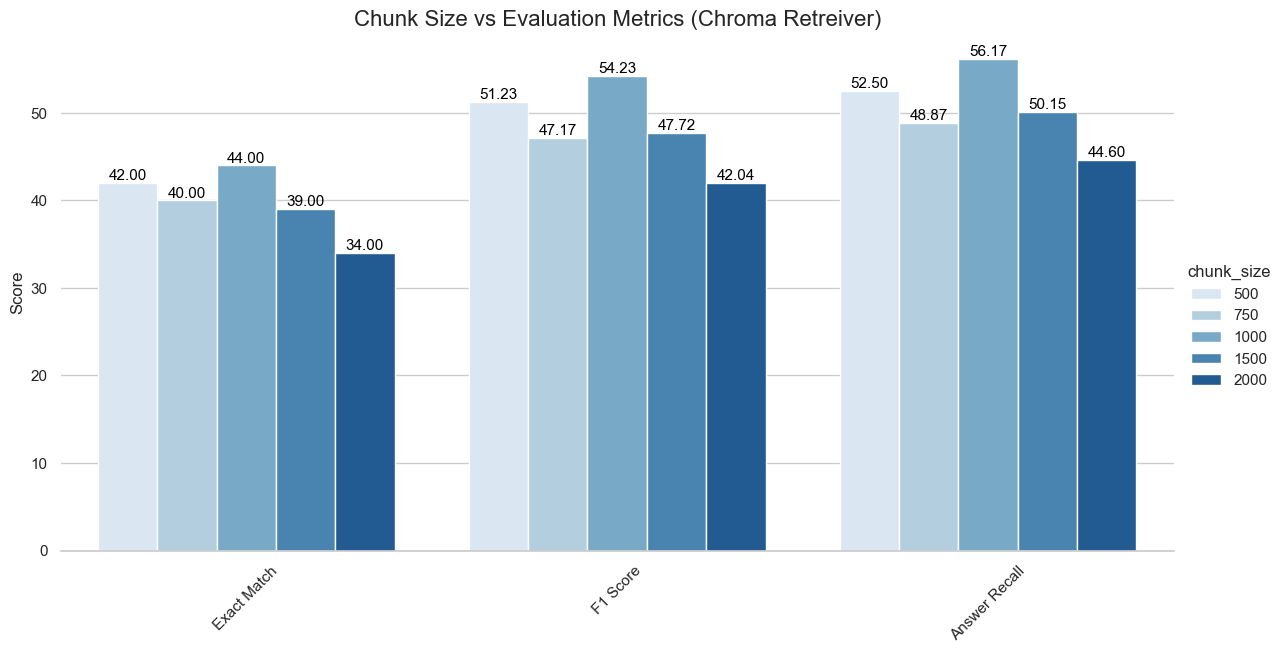

In [149]:
plot_grouped_bar_chart(chunking_size_df, ['chunk_size'], 'Chunk Size vs Evaluation Metrics (Chroma Retreiver)')

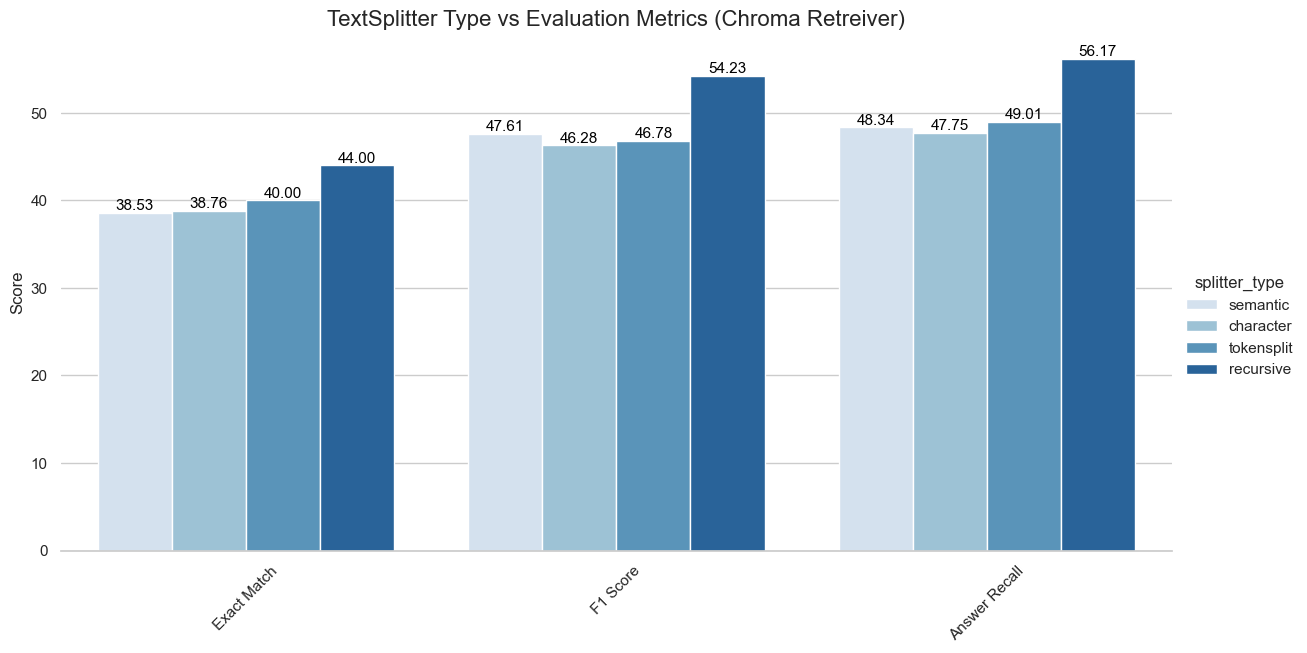

In [148]:
plot_grouped_bar_chart(splitter_type_df, ['splitter_type'], 'TextSplitter Type vs Evaluation Metrics (Chroma Retreiver)')

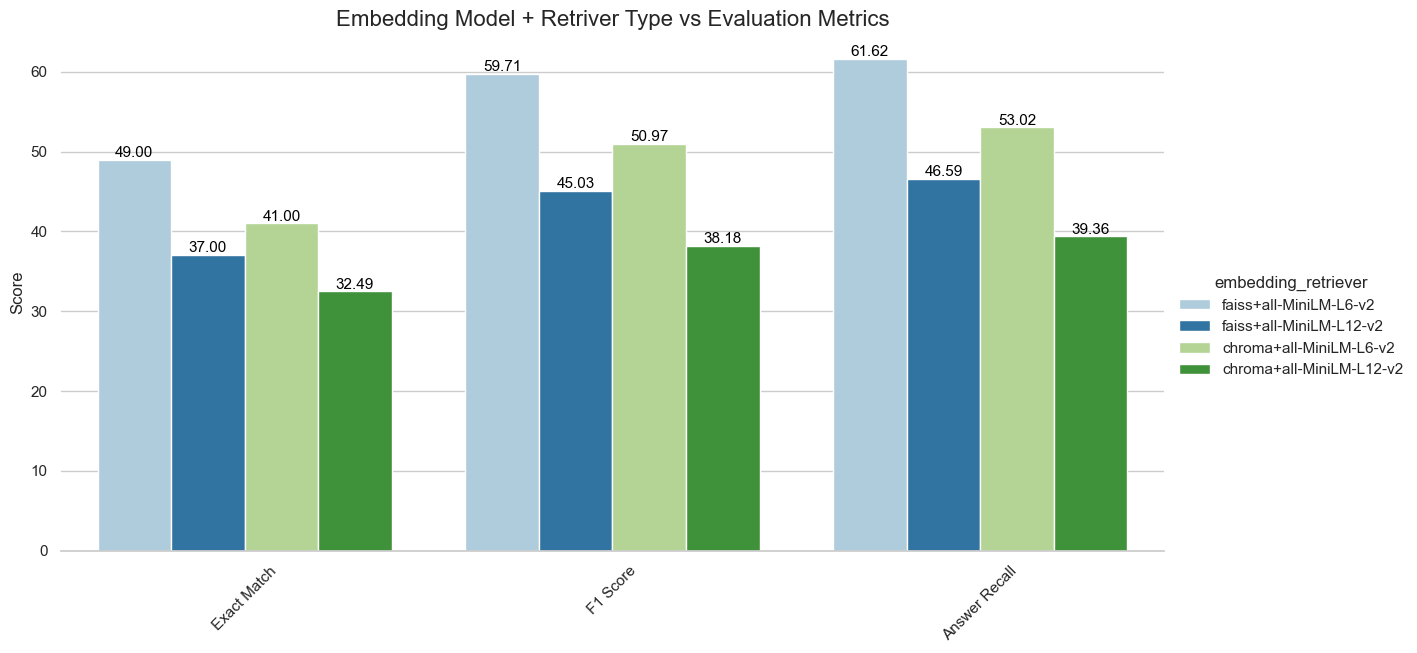

In [164]:
# concatenate the 'retrieve_type' and 'embedding_model' to form a new column 'embedding_retriever'
embedding_model_df['embedding_retriever'] = embedding_model_df['retrieve_type'] + "+" + embedding_model_df['embedding_model']
plot_grouped_bar_chart(embedding_model_df, ['embedding_retriever'], 'Embedding Model + Retriver Type vs Evaluation Metrics')

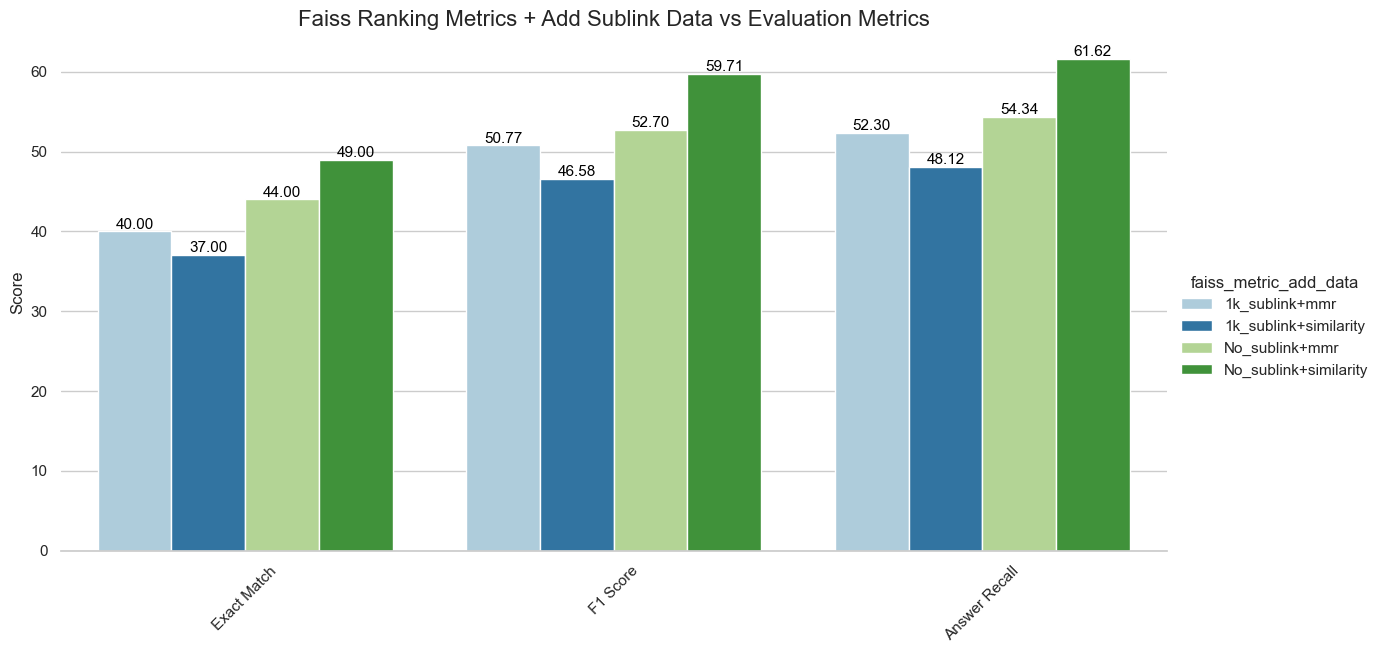

In [183]:
add_sublink_faiss_metric_df['faiss_metric_add_data'] = add_sublink_faiss_metric_df['add_sublink_data'] + '+' + add_sublink_faiss_metric_df['faiss_hyper_param']
plot_grouped_bar_chart(add_sublink_faiss_metric_df, ['faiss_metric_add_data'], 'Faiss Ranking Metrics + Add Sublink Data vs Evaluation Metrics')

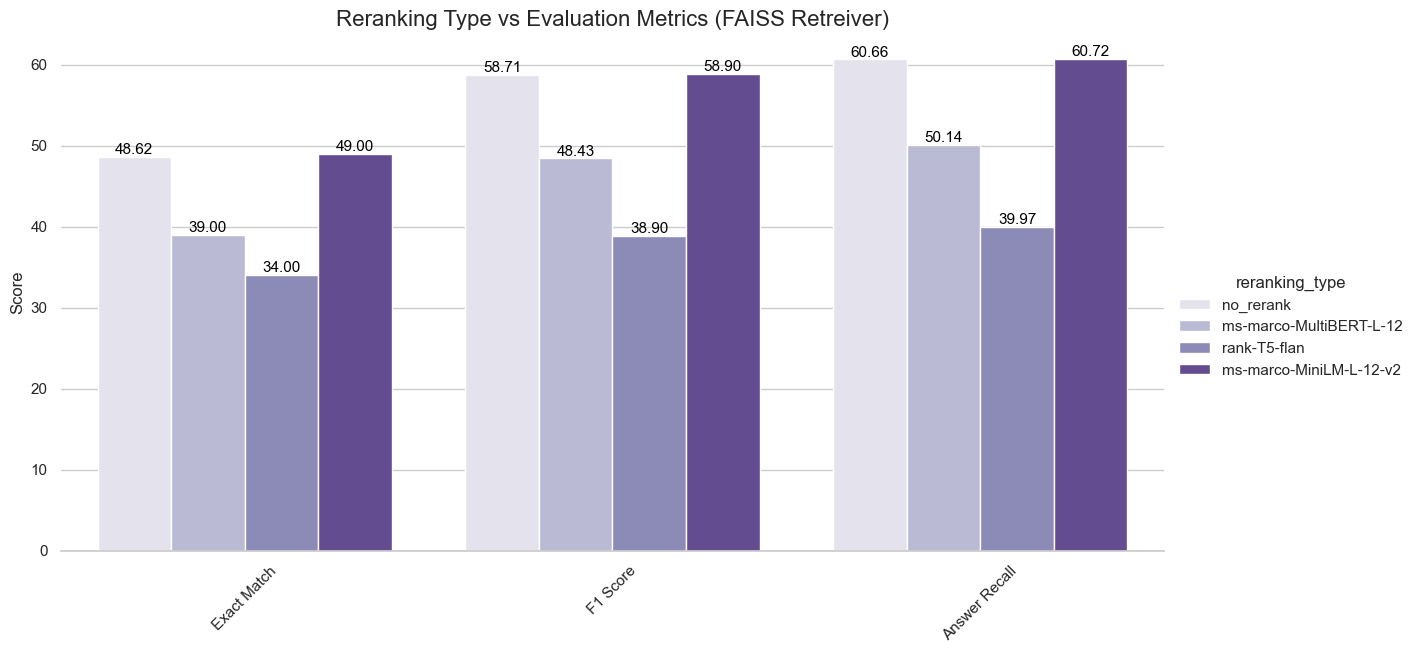

In [152]:
# for reranking
plot_grouped_bar_chart(reranking_df, ['reranking_type'], 'Reranking Type vs Evaluation Metrics (FAISS Retreiver)')

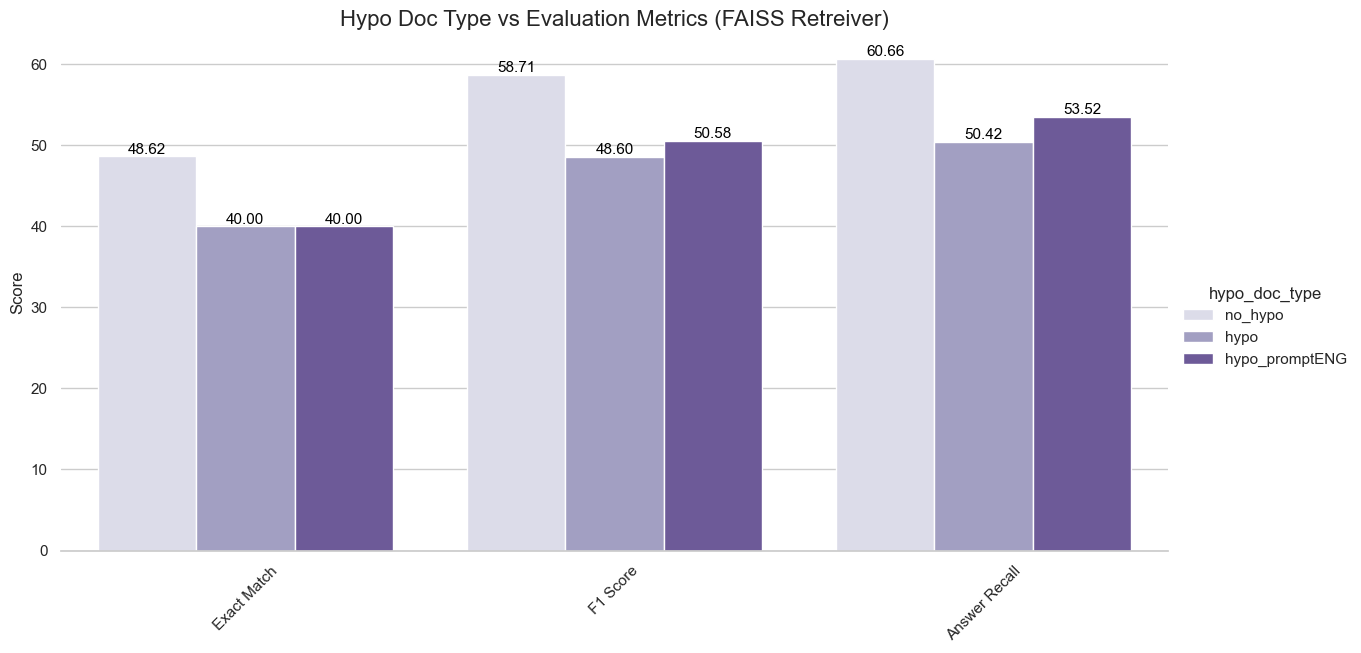

In [187]:
# for hypo doc
plot_grouped_bar_chart(hypo_doc_df, ['hypo_doc_type'], 'Hypo Doc Type vs Evaluation Metrics (FAISS Retreiver)')

In [195]:
# load results from \qa3000 folder
qa3000_results = [
    'qa3000/llama3_baseline.json',
    'qa3000/llama3_recursive_chunk1000_faiss_top3_3900.csv.json', 
    'qa3000/llama3_faiss_rerank.json',
    'qa3000/llama3_faiss_rerank_sublink.json', 
    'qa3000/llama3_faiss_rank_hypo.json']

In [196]:
# load the qa3000 results
qa3000_df = load_json_results(qa3000_results)
qa3000_df["strategy"] = ["closebook_baseline", "simple_baseline", "rerank", "rerank_sublink", "hypo"]

In [197]:
# melt the qa3000 dataframe
qa3000_df = melt_df(qa3000_df, ['strategy'])

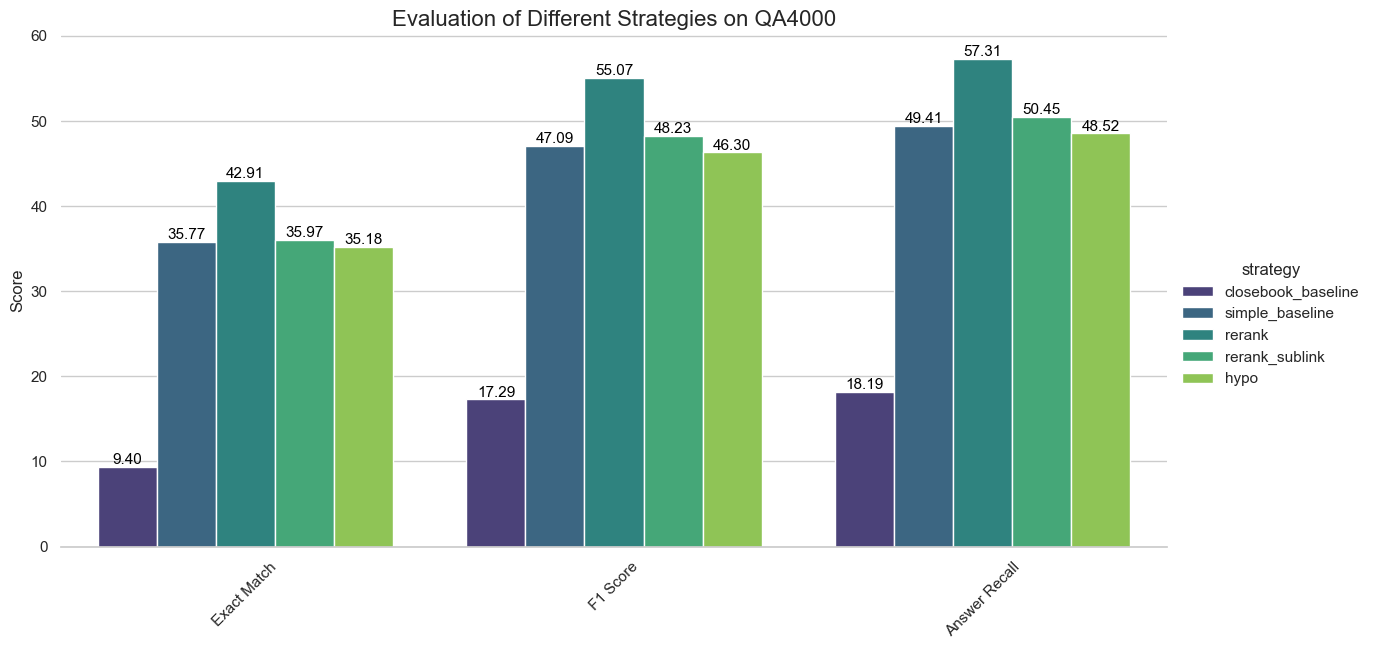

In [200]:
# plot the qa3000 results
plot_grouped_bar_chart(qa3000_df, ['strategy'], 'Evaluation of Different Strategies on QA4000')